In [1]:
import pandas as pd

Loading monthly trend data

In [2]:
monthly = pd.read_csv("../data/cleaned/monthly_trend.csv")
monthly["accident_date"] = pd.to_datetime(monthly["accident_date"])
monthly = monthly.sort_values("accident_date")
monthly.head()


,accident_date,accident_count
0,2018-01-01,40
1,2018-02-01,31
2,2018-03-01,38
3,2018-04-01,40
4,2018-05-01,33


In [3]:
pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.1 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/12.1 MB 2.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/12.1 MB 2.5 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/12.1 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/12.1 MB 2.4 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/12.1 MB 2.3 MB/s eta 0:00:04
   ----------- ---------------------------- 3.4/12.1 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.1 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 4.5/12.1 MB 2.2 MB/s eta 0:00:04
   ---------------- ----------------------- 5.0/12.1 MB 2.2 MB/s eta 0:00:04
   -----------------

Preparing prophet model

In [4]:
prophet_df = monthly.rename(columns={
    "accident_date": "ds",
    "accident_count": "y"
})


Training of the forecaste model

In [5]:
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)


c:\Users\manth\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:02:14 - cmdstanpy - INFO - Chain [1] start processing
15:02:15 - cmdstanpy - INFO - Chain [1] done processing


Prediction of next 3 years

In [6]:
future = model.make_future_dataframe(periods=36, freq="M")
forecast = model.predict(future)
forecast.tail()


c:\Users\manth\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
103,2026-07-31,43.804834,41.599734,53.811983,43.799421,43.810405,3.785171,3.785171,3.785171,3.785171,3.785171,3.785171,0.0,0.0,0.0,47.590005
104,2026-08-31,43.842376,31.506637,44.123937,43.836673,43.848194,-6.088860,-6.088860,-6.088860,-6.088860,-6.088860,-6.088860,0.0,0.0,0.0,37.753516
105,2026-09-30,43.878707,40.805972,53.914735,43.872773,43.884708,3.410276,3.410276,3.410276,3.410276,3.410276,3.410276,0.0,0.0,0.0,47.288982
106,2026-10-31,43.916249,36.558229,49.460439,43.909960,43.922607,-0.769726,-0.769726,-0.769726,-0.769726,-0.769726,-0.769726,0.0,0.0,0.0,43.146522
107,2026-11-30,43.952580,27.018662,39.770435,43.945960,43.959332,-10.303629,-10.303629,-10.303629,-10.303629,-10.303629,-10.303629,0.0,0.0,0.0,33.648950


In [7]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].to_csv("../data/cleaned/accident_forecast.csv", index=False)


Visualization

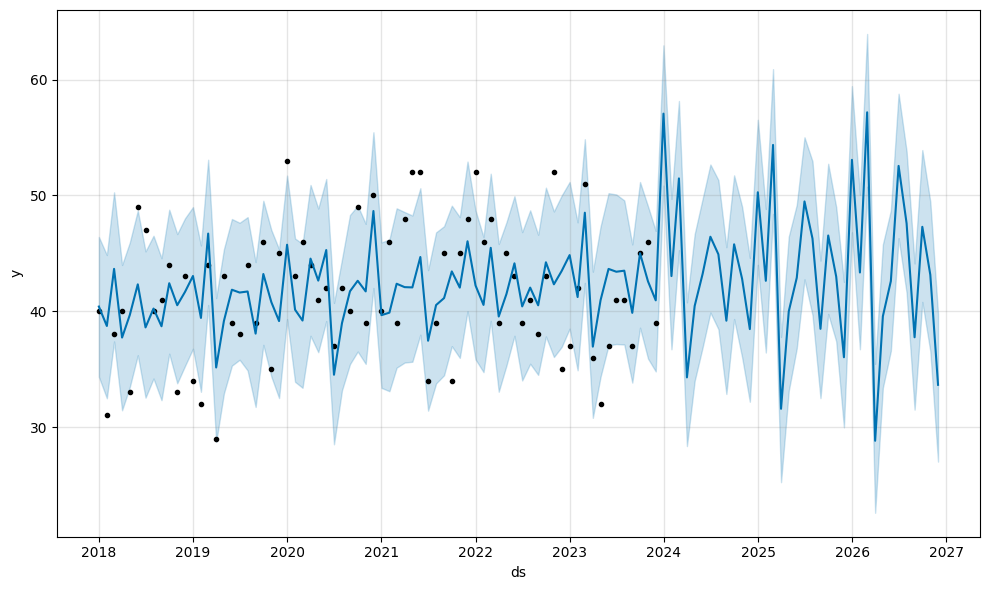

In [8]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.show()
